In [4]:
!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

In [6]:
draft_df = pd.read_csv('data.csv')

In [7]:
draft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30012 entries, 0 to 30011
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      30012 non-null  int64  
 1   match_id        30012 non-null  int64  
 2   duration        30012 non-null  int64  
 3   radiant_win     29227 non-null  object 
 4   dire_hero_1     29704 non-null  float64
 5   dire_hero_2     29703 non-null  float64
 6   dire_hero_3     29703 non-null  float64
 7   dire_hero_4     29702 non-null  float64
 8   dire_hero_5     29691 non-null  float64
 9   radiant_hero_1  29707 non-null  float64
 10  radiant_hero_2  29703 non-null  float64
 11  radiant_hero_3  29703 non-null  float64
 12  radiant_hero_4  29701 non-null  float64
 13  radiant_hero_5  29699 non-null  object 
dtypes: float64(9), int64(3), object(2)
memory usage: 3.2+ MB


In [8]:
print(list(draft_df.columns))

['Unnamed: 0', 'match_id', 'duration', 'radiant_win', 'dire_hero_1', 'dire_hero_2', 'dire_hero_3', 'dire_hero_4', 'dire_hero_5', 'radiant_hero_1', 'radiant_hero_2', 'radiant_hero_3', 'radiant_hero_4', 'radiant_hero_5']


In [9]:
from sklearn.model_selection import train_test_split 

In [10]:
X = draft_df.drop(['radiant_win', 'Unnamed: 0', 'match_id'], axis=1) 
y = draft_df['radiant_win']  

In [11]:
y = draft_df['radiant_win'].astype(float) 

In [12]:
print(draft_df['radiant_win'].isna().sum())  
print(draft_df['radiant_win'].unique())      

785
[True False nan]


In [13]:
y = draft_df['radiant_win'].fillna(0).astype(int)
X = draft_df.drop('radiant_win', axis=1)
print(y.head())

0    1
1    0
2    1
3    1
4    0
Name: radiant_win, dtype: int64


In [14]:
draft_df['radiant_win'] = draft_df['radiant_win'].fillna(0).astype(int)
y = draft_df['radiant_win']
X = draft_df.drop('radiant_win', axis=1)

In [15]:
y = draft_df['radiant_win'].astype(int)  
X = draft_df.drop('radiant_win', axis=1)  

radiant_win
0    0.505898
1    0.494102
Name: proportion, dtype: float64


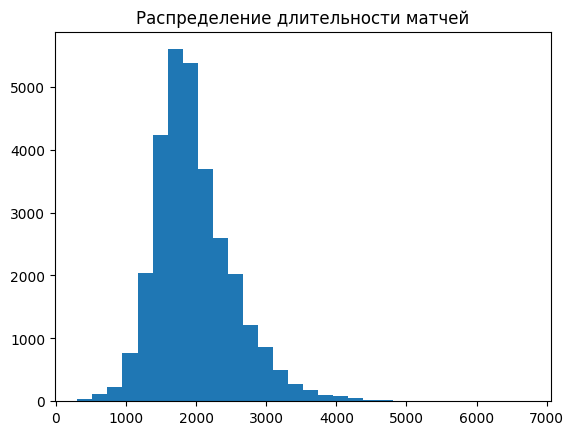

In [16]:
print(y.value_counts(normalize=True))
import matplotlib.pyplot as plt
plt.hist(draft_df['duration'], bins=30)
plt.title('Распределение длительности матчей')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
import pandas as pd
y = draft_df['radiant_win'].fillna(0).astype(int)  
X = draft_df.drop('radiant_win', axis=1)           
hero_columns = [f'{team}_hero_{i}' for team in ['radiant', 'dire'] for i in range(1, 6)]
X_encoded = pd.get_dummies(X, columns=hero_columns)  
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, 
    y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print(f"Тренировочный набор: {X_train.shape[0]} матчей")
print(f"Тестовый набор: {X_test.shape[0]} матчей")

Тренировочный набор: 24009 матчей
Тестовый набор: 6003 матчей


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [20]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")

Accuracy: 0.533
ROC-AUC: 0.565


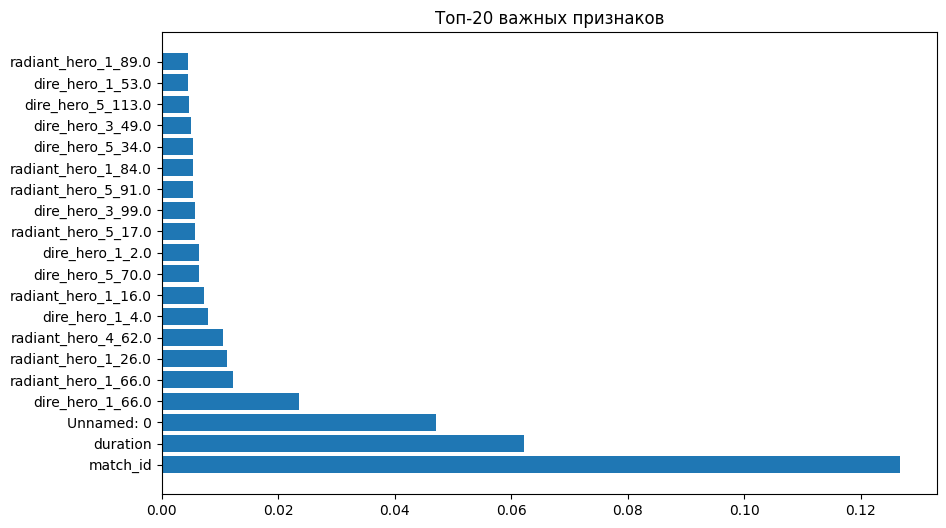

In [21]:
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'][:20], feature_importance['importance'][:20])
plt.title('Топ-20 важных признаков')
plt.show()

In [26]:
X_train['radiant_strong_heroes'] = X_train.filter(like='radiant_hero').sum(axis=1)
X_test['radiant_strong_heroes'] = X_test.filter(like='radiant_hero').sum(axis=1)

In [55]:
data

,radiant_win,dire_hero_1,dire_hero_2,dire_hero_3,dire_hero_4,dire_hero_5,radiant_hero_1,radiant_hero_2,radiant_hero_3,radiant_hero_4,radiant_hero_5
0,1.0,71,26,87,48,39,83,79,11,10,107
1,0.0,95,107,123,68,17,119,50,98,11,67
2,1.0,137,112,103,16,35,27,98,45,94,129
3,1.0,27,100,33,25,76,5,26,14,18,22
4,0.0,102,121,85,10,39,71,30,86,17,12
...,...,...,...,...,...,...,...,...,...,...,...
30007,0.0,36,11,22,26,54,68,62,84,114,1
30008,1.0,64,51,84,114,109,35,22,36,25,49
30009,1.0,11,48,2,101,30,85,86,46,104,39
30010,0.0,86,31,104,39,42,11,48,2,101,87


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
data = pd.read_csv('data.csv')
print("Пропуски до обработки:", data['radiant_win'].isna().sum())
data = data.dropna(subset=['radiant_win']) 
y = data['radiant_win'].astype(int) 
X = data.drop(columns=['radiant_win'])
model = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Пропуски до обработки: 785


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:radiant_hero_5: object

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
data = pd.read_csv('data.csv')
data.radiant_win = data.radiant_win.map({True: 1, False: 0})
data = data.drop(columns=['Unnamed: 0', 'match_id', 'duration'])
data = data.dropna()
data.loc[5, 'radiant_hero_5'] = 36.0
for col in data.columns:
    data[col] = data[col].astype('float')
for col in data.columns:
    data[col] = data[col].astype('int')
y = data['radiant_win']
#y = y.fillna(y.mode()[0]) 
print("Уникальные значения y:", np.unique(y))
X = data.drop(columns=['radiant_win'])
model = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
draft_df = draft_df.drop(columns=['Unnamed: 0', 'match_id', 'duration'])

In [ ]:
data.info()

In [ ]:
data.radiant_hero_5.value_counts()

In [ ]:
data[data.radiant_hero_5 == "36.0о"]

In [ ]:
for col in data.columns:
    data[col] = data[col].astype('int')

In [ ]:
data.loc[5, 'radiant_hero_5'] = 36.0

In [59]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data = pd.read_csv('data.csv')
data.radiant_win = data.radiant_win.map({True: 1, False: 0})
data = data.drop(columns=['Unnamed: 0', 'match_id', 'duration'])
data = data.dropna()
data.loc[5, 'radiant_hero_5'] = 36.0
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce').astype('float')
    data[col] = data[col].astype('int')
y = data['radiant_win']
X = data.drop(columns=['radiant_win'])
print("Уникальные значения y:", np.unique(y))
model = LogisticRegression(max_iter=1000) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Уникальные значения y: [0 1]
Accuracy: 0.5043227665706052


In [60]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = pd.read_csv('data.csv')
data.radiant_win = data.radiant_win.map({True: 1, False: 0})
data = data.drop(columns=['Unnamed: 0', 'match_id', 'duration'])
data = data.dropna()
data.loc[5, 'radiant_hero_5'] = 36.0

for col in data.columns:
    data[col] = data[col].astype('float32') 
y = data['radiant_win']
X = data.drop(columns=['radiant_win'])
print("Уникальные значения y:", np.unique(y))
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.5))  
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))

Уникальные значения y: [0. 1.]
Epoch 1/10


C:\Users\PYTHON\PycharmProjects\Самый лучший проект в вашей жизни\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5101 - loss: 4.5979 - val_accuracy: 0.5072 - val_loss: 0.7812
Epoch 2/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5060 - loss: 0.9252 - val_accuracy: 0.4953 - val_loss: 0.7184
Epoch 3/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4973 - loss: 0.7588 - val_accuracy: 0.4941 - val_loss: 0.6997
Epoch 4/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5028 - loss: 0.7256 - val_accuracy: 0.4951 - val_loss: 0.7022
Epoch 5/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4983 - loss: 0.7100 - val_accuracy: 0.5124 - val_loss: 0.6983
Epoch 6/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5098 - loss: 0.7012 - val_accuracy: 0.4956 - val_loss: 0.6965
Epoch 7/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5167 - loss: 0.6961 - val_accuracy: 0.5030 - val_loss: 0.6960
Epoch 8/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5057 - loss: 0.6971 - val_accuracy: 0.4852 - val_

In [62]:
print(X_train.shape, y_train.shape)  
print("Баланс классов:", np.mean(y_train))  

(20240, 10) (20240,)
Баланс классов: 0.5088439


In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

C:\Users\PYTHON\PycharmProjects\Самый лучший проект в вашей жизни\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [66]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=5)
]

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4948 - loss: 0.8290 - val_accuracy: 0.5072 - val_loss: 0.6987 - learning_rate: 0.0010
Epoch 2/100
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5046 - loss: 0.7186 - val_accuracy: 0.4904 - val_loss: 0.6996 - learning_rate: 0.0010
Epoch 3/100
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5046 - loss: 0.7012 - val_accuracy: 0.5042 - val_loss: 0.6954 - learning_rate: 0.0010
Epoch 4/100
506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5139 - loss: 0.6951 - val_accuracy: 0.5032 - val_loss: 0.6956 - learning_rate: 0.0010
Epoch 5/100
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5124 - loss: 0.6932 - val_accuracy: 0.5104 - val_loss: 0.6942 - learning_rate: 0.0010
Epoch 6/100
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5155 - loss: 0.6937 - val_accuracy: 0.5025 - val_loss: 0.6956 - learning_rate: 0.0010
Epoch 7/100
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5183 - loss: 0.

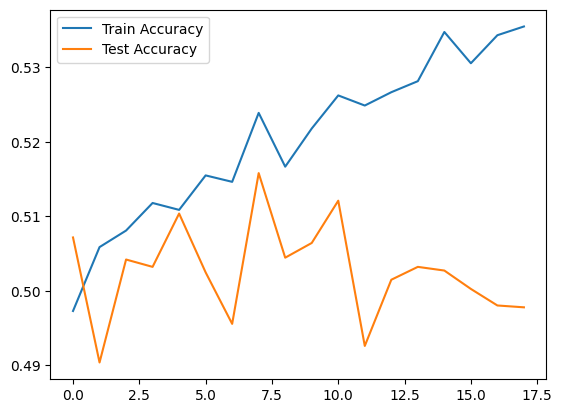

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()

In [68]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.5112391930835735


In [69]:
xgb_model = XGBClassifier(
    n_estimators=500,  # Увеличить количество деревьев
    max_depth=6,       # Глубина деревьев
    learning_rate=0.01, # Меньше скорость обучения
    subsample=0.8,     # Доля случайных samples
    colsample_bytree=0.8 # Доля случайных признаков
)

In [70]:
!pip install catboost


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
from catboost import CatBoostClassifier  
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
print(f"CatBoost Accuracy: {accuracy_score(y_test, y_pred_cat):.4f}")

CatBoost Accuracy: 0.5087


In [72]:
y = y.fillna(y.mode()[0]) 

In [73]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = pd.read_csv('data.csv')
data['radiant_win'] = data['radiant_win'].map({True: 1, False: 0})
data = data.drop(columns=['Unnamed: 0', 'match_id', 'duration'], errors='ignore')
print("Пропуски в y до обработки:", data['radiant_win'].isna().sum())
data = data.dropna(subset=['radiant_win']) 
y = data['radiant_win'].astype(int) 
for col in data.filter(like='hero').columns:
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0).astype('float32')
X = data.drop(columns=['radiant_win'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = CatBoostClassifier(iterations=500, learning_rate=0.05, random_state=42, verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Пропуски в y до обработки: 785
Accuracy: 0.5157


In [74]:
print("Процент побед Radiant:", y_train.mean())

Процент побед Radiant: 0.5067455274220354


In [75]:
model = CatBoostClassifier(
    loss_function='Logloss',  # Для бинарной классификации
    eval_metric='Accuracy',  # Следить за accuracy
    auto_class_weights='Balanced',  # Необязательно, но может помочь
    bootstrap_type='Bayesian',  # Улучшенный алгоритм бутстрапа
    random_seed=42
)

In [76]:
!pip install lightgbm


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
!pip install pandas numpy matplotlib scikit-learn lightgbm joblib


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
!pip install --upgrade lightgbm


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
data = pd.read_csv('data.csv')
print("Пропуски в данных ДО обработки:")
print(data.isna().sum())
data['radiant_win'] = data['radiant_win'].map({True: 1, False: 0})
data = data.drop(columns=['Unnamed: 0', 'match_id', 'duration'], errors='ignore')
for col in data.filter(like='hero').columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col] = data[col].fillna(0).astype('int32')
data = data.dropna()
print("\nПропуски в данных ПОСЛЕ обработки:")
print(data.isna().sum())
X = data.drop(columns=['radiant_win'])
y = data['radiant_win']
assert not X.isna().any().any(), "В данных остались пропуски!"
assert not y.isna().any(), "В целевой переменной остались пропуски!"
model = LGBMClassifier()
model.fit(X, y)  

Пропуски в данных ДО обработки:
Unnamed: 0          0
match_id            0
duration            0
radiant_win       785
dire_hero_1       308
dire_hero_2       309
dire_hero_3       309
dire_hero_4       310
dire_hero_5       321
radiant_hero_1    305
radiant_hero_2    309
radiant_hero_3    309
radiant_hero_4    311
radiant_hero_5    313
dtype: int64

Пропуски в данных ПОСЛЕ обработки:
radiant_win       0
dire_hero_1       0
dire_hero_2       0
dire_hero_3       0
dire_hero_4       0
dire_hero_5       0
radiant_hero_1    0
radiant_hero_2    0
radiant_hero_3    0
radiant_hero_4    0
radiant_hero_5    0
dtype: int64
[LightGBM] [Info] Number of positive: 14829, number of negative: 14398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 29227, number of used features: 10
[LightGBM] [Info] 

LGBMClassifier()

[LightGBM] [Info] Number of positive: 10367, number of negative: 10091
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1248
[LightGBM] [Info] Number of data points in the train set: 20458, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506746 -> initscore=0.026984
[LightGBM] [Info] Start training from score 0.026984

Оценка качества модели:
Accuracy: 0.5167
Precision: 0.5232
Recall: 0.5663
F1-score: 0.5439
ROC-AUC: 0.5207


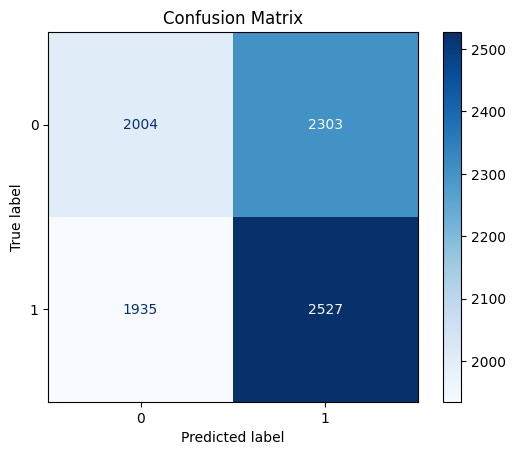

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, 
                           recall_score, f1_score, roc_auc_score,
                           confusion_matrix, ConfusionMatrixDisplay)

# Разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Переобучение модели на тренировочных данных
model.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Вероятности для ROC-AUC

# Вывод метрик
print("\n" + "="*50)
print("Оценка качества модели:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [81]:
from sklearn.model_selection import GridSearchCV

# Сетка параметров для поиска
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63]
}

# Поиск по сетке
grid_search = GridSearchCV(
    estimator=LGBMClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Лучшие параметры
print("\nЛучшие параметры:", grid_search.best_params_)
print("Лучшая accuracy:", grid_search.best_score_)

[LightGBM] [Info] Number of positive: 10367, number of negative: 10091
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1248
[LightGBM] [Info] Number of data points in the train set: 20458, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506746 -> initscore=0.026984
[LightGBM] [Info] Start training from score 0.026984
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,